# Download the dataset from Kaggle

In [2]:
! pip install -q kaggle

Create New API Token on your Kaggle account. It will download kaggle.json file on your machine.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!pwd

/content


In [8]:
 ! kaggle datasets list

ref                                                           title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                              9MB  2023-03-20 15:43:25           2849        112  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                      2MB  2023-03-13 18:49:00           1926         53  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector Composition      8KB  2023-03-20 04:42:10           1540         56  1.0              
datascientistanna/customers-dataset                           Shop Customer Data               

In [9]:
! kaggle datasets download 'mlg-ulb/creditcardfraud'

 99% 65.0M/66.0M [00:03<00:00, 24.5MB/s]
100% 66.0M/66.0M [00:03<00:00, 17.7MB/s]


In [10]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


# Load the dataset

In [11]:
import pandas as pd

data = pd.read_csv("creditcard.csv")

# Train a sequential neural network on the dataset

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, f1_score, recall_score, precision_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [13]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [15]:
print(X_test.shape)
print(X_train.shape)

(56962, 30)
(227845, 30)


In [16]:
class_weight = {1: 0.9, 0: .1}# We assign a weight for target classes to handle imbalance.

# Define the Keras model: 2 hidden layer and an output layer
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))#The sigmoid activation function is commonly used for binary classification tasks because it maps the output of the neural network to a value between 0 and 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), class_weight = class_weight)


Epoch 1/10
7121/7121 [==============================] - 45s 5ms/step - loss: 0.0027 - accuracy: 0.9982 - val_loss: 0.0056 - val_accuracy: 0.9992
Epoch 2/10
7121/7121 [==============================] - 31s 4ms/step - loss: 0.0015 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9991
Epoch 3/10
7121/7121 [==============================] - 34s 5ms/step - loss: 0.0013 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9992
Epoch 4/10
7121/7121 [==============================] - 30s 4ms/step - loss: 0.0013 - accuracy: 0.9991 - val_loss: 0.0075 - val_accuracy: 0.9986
Epoch 5/10
7121/7121 [==============================] - 32s 4ms/step - loss: 0.0012 - accuracy: 0.9991 - val_loss: 0.0060 - val_accuracy: 0.9989
Epoch 6/10
7121/7121 [==============================] - 30s 4ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 0.0045 - val_accuracy: 0.9989
Epoch 7/10
7121/7121 [==============================] - 32s 4ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 0.0058 - val_ac

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

1781/1781 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9990
Test Loss: 0.005198524799197912
Test Accuracy: 0.9990344643592834


In [18]:
prob_X_test=model.predict(X_test)
prob_X_train=model.predict(X_train) 

label_train=np.argmax(prob_X_train,axis=1)
label_test= np.argmax(prob_X_test, axis =1)

7121/7121 [==============================] - 11s 2ms/step


In [35]:
train_performance1 = []
test_performance1 = []

metrics_list = [accuracy_score,precision_score, recall_score, f1_score ]
for m in metrics_list:
    train_performance1.append(m(y_train,label_train))
    test_performance1.append(m(y_test,label_test))


performance_df1 = pd.DataFrame([train_performance1,test_performance1], columns=['accuracy', 'precision', 'recall', 'f1'], index= ['trian','test'])
performance_df1


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1
trian,0.998271,0.0,0.0,0.0
test,0.998280,0.0,0.0,0.0


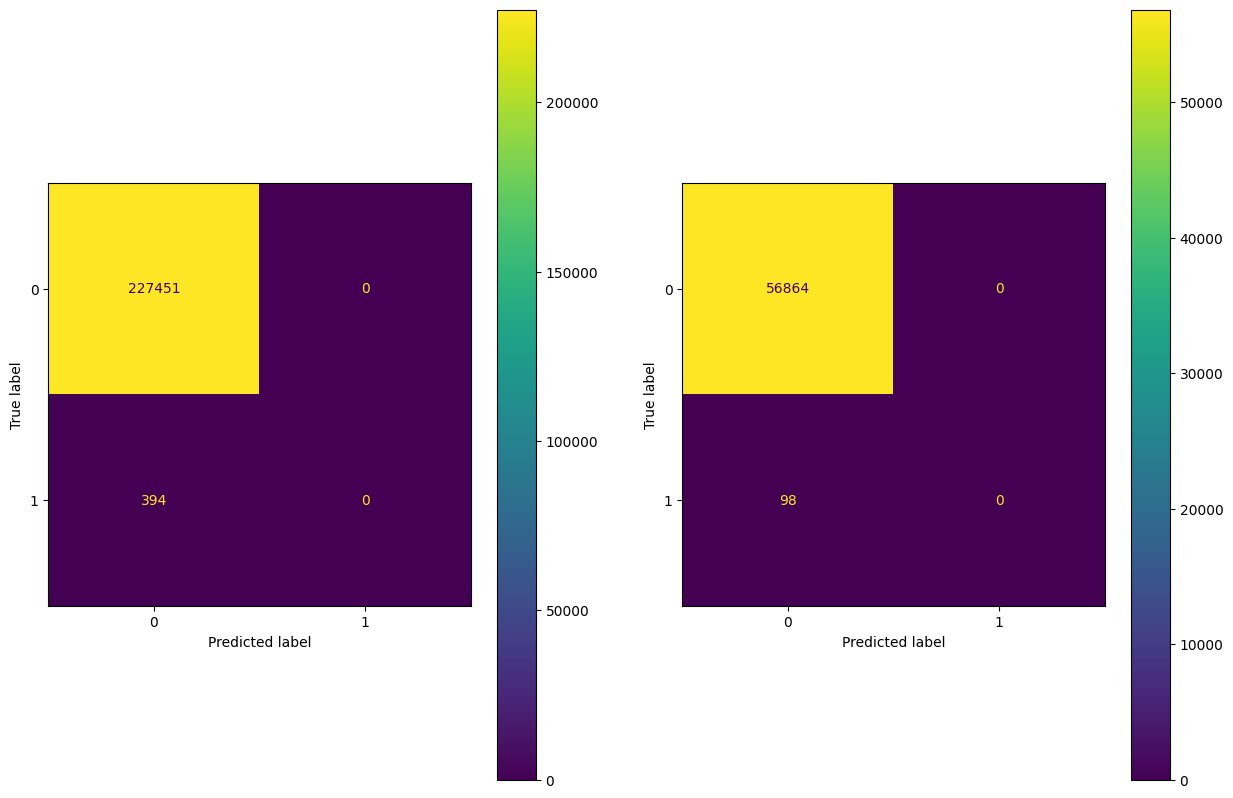

In [20]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from matplotlib.pyplot import figure, gcf


fig, ax = plt.subplots(1,2)

fig = gcf()
fig.set_size_inches(15, 10)
#fig.savefig('test2png.png', dpi=100)

cm_train_display = metrics.ConfusionMatrixDisplay.from_predictions(y_train, label_train, ax= ax[0])#display_labels = [False, True])

cm_test_display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, label_test, ax = ax[1] )#display_labels = [False, True])

#plt.subplot(1)
#cm_train_display.plot()
#print(cm_train_display.ax_)
#plt.title("trian")

#plt.subplot(1,2,2)
#cm_test_display.plot()
#plt.title("test")

cm_train_display.confusion_matrix
cm_test_display.confusion_matrix
plt.show()


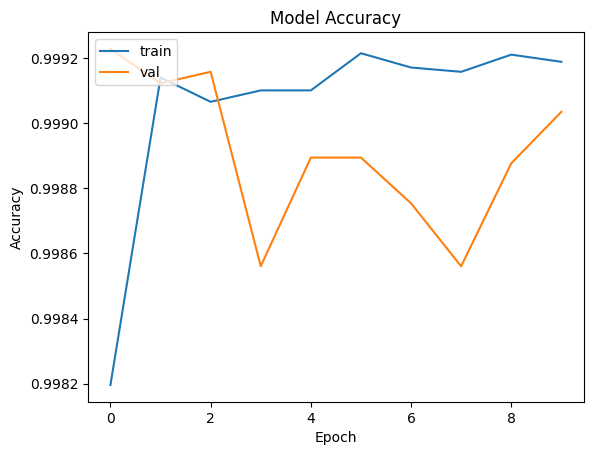

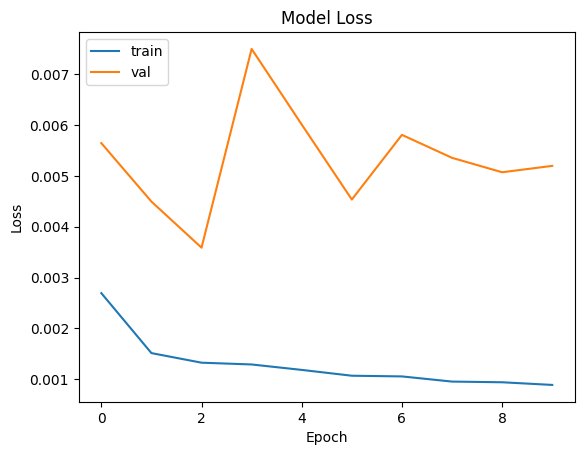

In [22]:
import matplotlib.pyplot as plt


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# Handle the imbalanced issue using oversampling

In [23]:

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [24]:
sum(y_train==1)

227451

In [25]:
class_weight = {1: 0.9, 0: .1}# We assign a weight for target classes to handle imbalance.

# Define the Keras model: 2 hidden layer and an output layer
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))#The sigmoid activation function is commonly used for binary classification tasks because it maps the output of the neural network to a value between 0 and 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), class_weight = class_weight)


Epoch 1/10
14216/14216 [==============================] - 58s 4ms/step - loss: 0.0074 - accuracy: 0.9791 - val_loss: 0.0334 - val_accuracy: 0.9924
Epoch 2/10
14216/14216 [==============================] - 55s 4ms/step - loss: 0.0015 - accuracy: 0.9972 - val_loss: 0.0205 - val_accuracy: 0.9961
Epoch 3/10
14216/14216 [==============================] - 55s 4ms/step - loss: 9.9532e-04 - accuracy: 0.9982 - val_loss: 0.0173 - val_accuracy: 0.9973
Epoch 4/10
14216/14216 [==============================] - 57s 4ms/step - loss: 7.7180e-04 - accuracy: 0.9987 - val_loss: 0.0164 - val_accuracy: 0.9977
Epoch 5/10
14216/14216 [==============================] - 64s 5ms/step - loss: 6.9891e-04 - accuracy: 0.9988 - val_loss: 0.0151 - val_accuracy: 0.9981
Epoch 6/10
14216/14216 [==============================] - 60s 4ms/step - loss: 6.2369e-04 - accuracy: 0.9990 - val_loss: 0.0336 - val_accuracy: 0.9958
Epoch 7/10
14216/14216 [==============================] - 54s 4ms/step - loss: 5.5167e-04 - accuracy: 

In [26]:
prob_X_test=model.predict(X_test)
prob_X_train=model.predict(X_train) 

label_train=np.argmax(prob_X_train,axis=1)
label_test= np.argmax(prob_X_test, axis =1)

14216/14216 [==============================] - 22s 2ms/step


In [27]:
train_performance1 = []
test_performance1 = []

metrics_list = [accuracy_score,precision_score, recall_score, f1_score ]
for m in metrics_list:
    train_performance1.append(m(y_train,label_train))
    test_performance1.append(m(y_test,label_test))


performance_df1 = pd.DataFrame([train_performance1,test_performance1], columns=['accuracy', 'precision', 'recall', 'f1'], index= ['trian','test'])
performance_df1

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1
trian,0.50000,0.0,0.0,0.0
test,0.99828,0.0,0.0,0.0


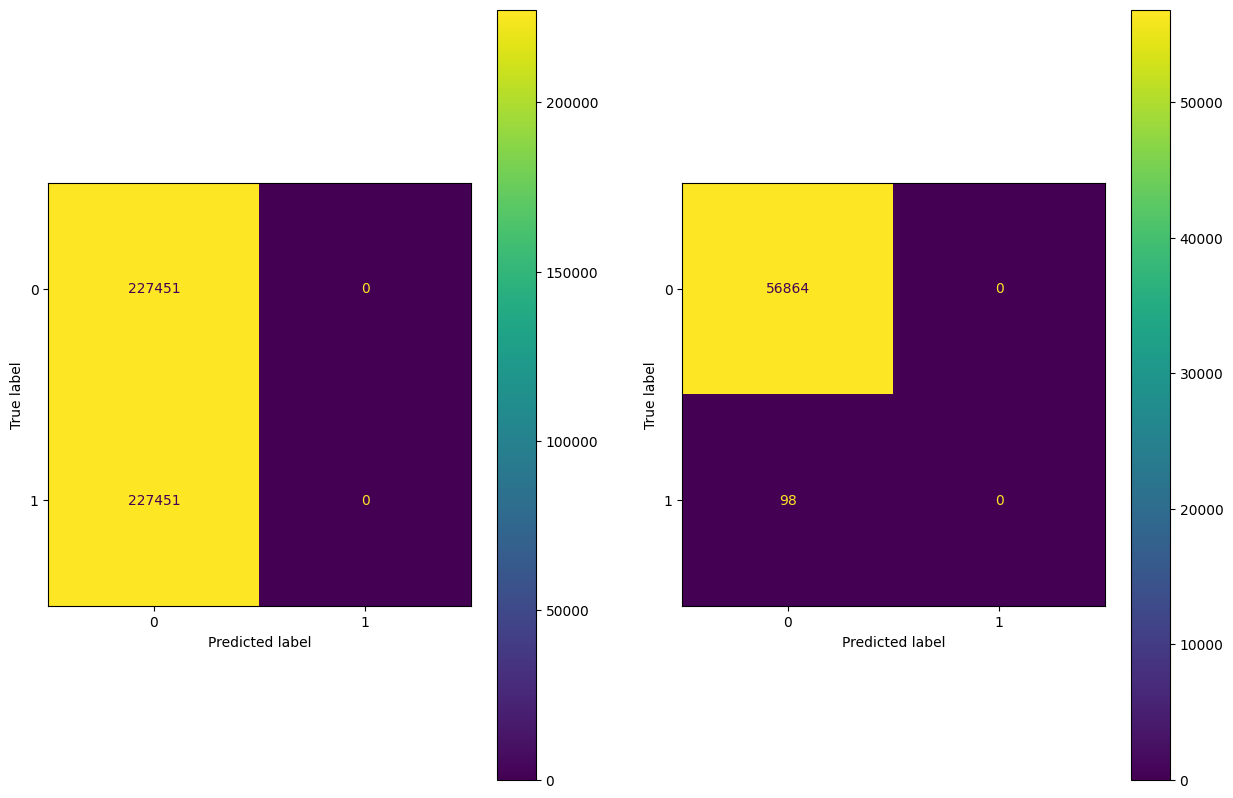

In [28]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from matplotlib.pyplot import figure, gcf


fig, ax = plt.subplots(1,2)

fig = gcf()
fig.set_size_inches(15, 10)
#fig.savefig('test2png.png', dpi=100)

cm_train_display = metrics.ConfusionMatrixDisplay.from_predictions(y_train, label_train, ax= ax[0])#display_labels = [False, True])

cm_test_display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, label_test, ax = ax[1] )#display_labels = [False, True])

#plt.subplot(1)
#cm_train_display.plot()
#print(cm_train_display.ax_)
#plt.title("trian")

#plt.subplot(1,2,2)
#cm_test_display.plot()
#plt.title("test")

cm_train_display.confusion_matrix
cm_test_display.confusion_matrix
plt.show()

#Handle imbanace data using **Focal loss**


**Focal loss** is a type of loss function used in machine learning for imbalanced classification tasks, where the number of samples in one class is much larger than the other class. In such cases, the model may have a bias towards the majority class, resulting in poor performance on the minority class.

Focal loss was introduced in the paper "Focal Loss for Dense Object Detection" by Lin et al. in 2017, and it addresses the problem of class imbalance by downweighting the loss assigned to well-classified examples. This is achieved by introducing a modulating factor to the cross-entropy loss function, which decreases as the model becomes more confident in its predictions.

Focal loss has been shown to be effective in improving the performance of deep learning models on imbalanced classification tasks, particularly in the field of object detection, where the number of background examples is typically much larger than the number of foreground examples.

In [29]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [31]:
from keras import backend as K
import tensorflow as tf

def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
      pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
      pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
      loss = -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))
      return loss
    return focal_loss_fixed 

model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=0.25), metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), class_weight = class_weight)

Epoch 1/15
7121/7121 [==============================] - 40s 5ms/step - loss: 0.0025 - accuracy: 0.9995 - precision: 0.8760 - recall: 0.8249 - auc: 0.9783 - val_loss: inf - val_accuracy: 0.9989 - val_precision: 0.6638 - val_recall: 0.7857 - val_auc: 0.9384
Epoch 2/15
7121/7121 [==============================] - 37s 5ms/step - loss: 0.0022 - accuracy: 0.9995 - precision: 0.8798 - recall: 0.8173 - auc: 0.9782 - val_loss: 0.0861 - val_accuracy: 0.9991 - val_precision: 0.7765 - val_recall: 0.6735 - val_auc: 0.9180
Epoch 3/15
7121/7121 [==============================] - 37s 5ms/step - loss: 0.0011 - accuracy: 0.9995 - precision: 0.9020 - recall: 0.8173 - auc: 0.9935 - val_loss: inf - val_accuracy: 0.9991 - val_precision: 0.7069 - val_recall: 0.8367 - val_auc: 0.9384
Epoch 4/15
7121/7121 [==============================] - 37s 5ms/step - loss: 0.0010 - accuracy: 0.9996 - precision: 0.8946 - recall: 0.8401 - auc: 0.9947 - val_loss: inf - val_accuracy: 0.9991 - val_precision: 0.7238 - val_recall

In [32]:
prob_X_test=model.predict(X_test)
prob_X_train=model.predict(X_train) 

label_train=np.argmax(prob_X_train,axis=1)
label_test= np.argmax(prob_X_test, axis =1)

7121/7121 [==============================] - 12s 2ms/step


In [33]:
train_performance1 = []
test_performance1 = []

metrics_list = [accuracy_score,precision_score, recall_score, f1_score ]
for m in metrics_list:
    train_performance1.append(m(y_train,label_train))
    test_performance1.append(m(y_test,label_test))


performance_df1 = pd.DataFrame([train_performance1,test_performance1], columns=['accuracy', 'precision', 'recall', 'f1'], index= ['trian','test'])
performance_df1

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1
trian,0.998271,0.0,0.0,0.0
test,0.998280,0.0,0.0,0.0


#Change the layers

In [34]:
class_weight = {1: 0.9, 0: .1}# We assign a weight for target classes to handle imbalance.

# Define the Keras model: 2 hidden layer and an output layer
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))#The sigmoid activation function is commonly used for binary classification tasks because it maps the output of the neural network to a value between 0 and 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), class_weight = class_weight)

Epoch 1/15
7121/7121 [==============================] - 33s 4ms/step - loss: 0.0028 - accuracy: 0.9982 - val_loss: 0.0067 - val_accuracy: 0.9992
Epoch 2/15
7121/7121 [==============================] - 34s 5ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 0.0053 - val_accuracy: 0.9988
Epoch 3/15
7121/7121 [==============================] - 35s 5ms/step - loss: 0.0016 - accuracy: 0.9991 - val_loss: 0.0070 - val_accuracy: 0.9990
Epoch 4/15
7121/7121 [==============================] - 32s 5ms/step - loss: 0.0013 - accuracy: 0.9991 - val_loss: 0.0090 - val_accuracy: 0.9987
Epoch 5/15
7121/7121 [==============================] - 33s 5ms/step - loss: 0.0013 - accuracy: 0.9991 - val_loss: 0.0064 - val_accuracy: 0.9991
Epoch 6/15
7121/7121 [==============================] - 33s 5ms/step - loss: 0.0012 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9989
Epoch 7/15
7121/7121 [==============================] - 33s 5ms/step - loss: 0.0012 - accuracy: 0.9990 - val_loss: 0.0047 - val_ac

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

1781/1781 [==============================] - 4s 2ms/step - loss: 0.0047 - accuracy: 0.9992
Test Loss: 0.0047484105452895164
Test Accuracy: 0.9991573095321655


In [37]:
prob_X_test=model.predict(X_test)
prob_X_train=model.predict(X_train) 

label_train=np.argmax(prob_X_train,axis=1)
label_test= np.argmax(prob_X_test, axis =1)

7121/7121 [==============================] - 12s 2ms/step


In [38]:
train_performance1 = []
test_performance1 = []

metrics_list = [accuracy_score,precision_score, recall_score, f1_score ]
for m in metrics_list:
    train_performance1.append(m(y_train,label_train))
    test_performance1.append(m(y_test,label_test))


performance_df1 = pd.DataFrame([train_performance1,test_performance1], columns=['accuracy', 'precision', 'recall', 'f1'], index= ['trian','test'])
performance_df1


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1
trian,0.998271,0.0,0.0,0.0
test,0.998280,0.0,0.0,0.0


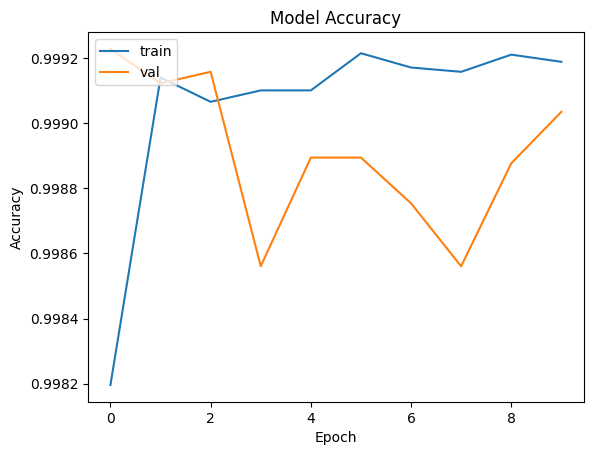

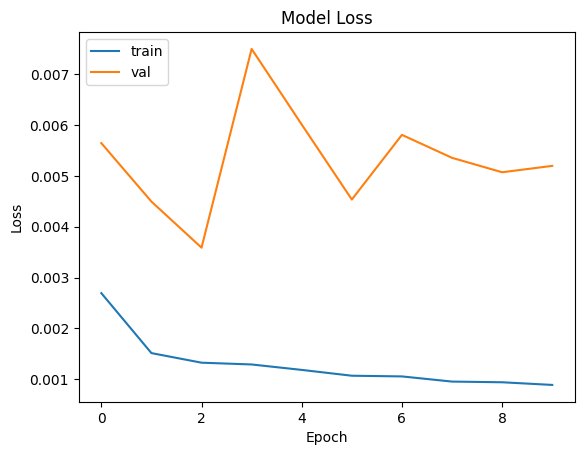

In [39]:
import matplotlib.pyplot as plt


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
